# Things to do
    - add humidity column
    - add weekday column
    - one hot encoder cbwd and weekday columns
    - fill NaN with not NaN before
    - outliers
    - add past data columns

### Rút kinh nghiệm sau vài lần chọn features cho model:  
    - Cột cbwd và thứ trong tuần không quá ảnh hưởng đến model nên không dùng nữa
    - Cột Ir và Is không ảnh hưởng nhiều đến model
    - Cột pres không ảnh hưởng nhiều dến model

- Thử phương pháp vét cạn, chọn trường hợp tối ưu nhất trong số tất cả cách chọn -> 2^(số cột)

In [1]:
import pandas as pd
import numpy as np
from math import exp, isnan
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = 15, 10

In [3]:
df = pd.read_csv('data.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


## Add humidity column

In [4]:
def cal(temp, dewp):
    return 100*(exp((17.625*dewp)/(243.04+dewp))/exp((17.625*temp)/(243.04+temp)))
df['hum'] = [cal(temp, dewp) for temp, dewp in zip(df['TEMP'], df['DEWP'])]

## Add weekday column

In [5]:
# weekday = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
# tmp = []
# for i, j, k in zip(df['day'], df['month'], df['year']):
#     date = weekday[datetime.strptime(str('{}/{}/{}'.format(i, j, k)), '%d/%m/%Y').weekday()]
#     tmp.append(date)
# df['weekday'] = tmp

## One Hot Encoder cbwd column

In [6]:
# df = pd.get_dummies(df)

## Fill NaN with not NaN before

In [7]:
df['pm2.5'].isna().sum()

2067

In [8]:
df['pm2.5'].fillna(method='ffill', inplace=True)

In [9]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,hum
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,43.543692
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,47.165689
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,43.543692
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,55.454538
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,51.426936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,18.340886
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,21.568601
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,21.568601
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,23.240409


## Outliers

In [10]:
dic = {}
for day, month, year, hour, pm25 in zip(df['day'], df['month'], df['year'], df['hour'], df['pm2.5']):
    dic[datetime.strptime(str('{}/{}/{} {}:00'.format(day, month, year, hour)), '%d/%m/%Y %H:%M')] = pm25

In [11]:
outlier_df = pd.DataFrame.from_dict(dic, orient='index', columns=['Value'])

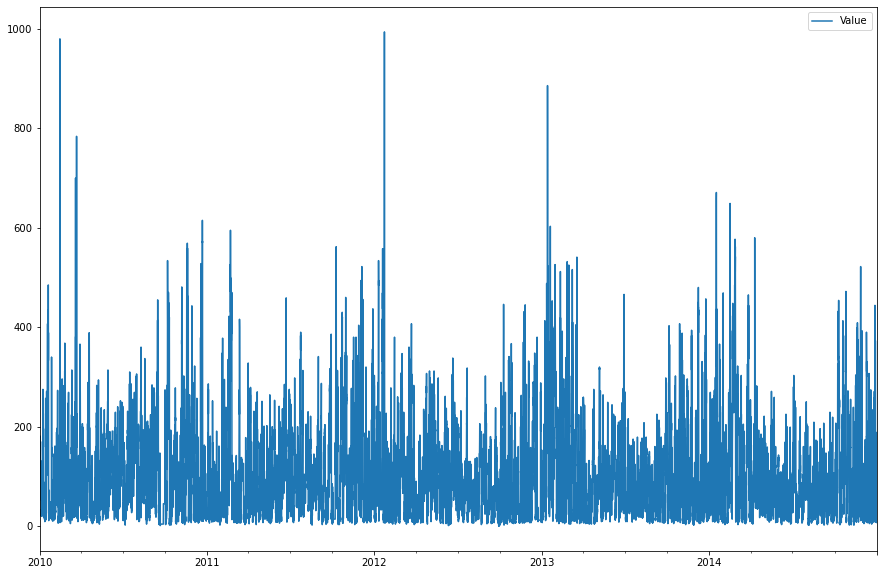

In [12]:
outlier_df.plot()
plt.show()

In [13]:
df = df[df['pm2.5'] <= 600]

In [14]:
df.corr()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,hum
No,1.000000,0.979818,0.198630,0.017443,0.000583,-0.009528,0.046393,0.077008,-0.024573,-0.062673,-0.029568,-0.016719,-0.013252
year,0.979818,1.000000,-0.000573,-0.001077,0.000154,-0.006876,0.000151,0.044835,-0.013069,-0.064370,-0.017062,-0.024493,-0.050575
month,0.198630,-0.000573,1.000000,0.009206,-0.000582,-0.021266,0.232543,0.167881,-0.061513,0.002493,-0.061901,0.036541,0.180682
day,0.017443,-0.001077,0.009206,1.000000,0.000052,0.081097,0.027328,0.013326,-0.006913,-0.009141,-0.036920,0.002559,0.028218
hour,0.000583,0.000154,-0.000582,0.000052,1.000000,-0.023593,-0.021267,0.150029,-0.041671,0.056610,-0.002391,-0.006322,-0.256729
pm2.5,-0.009528,-0.006876,-0.021266,0.081097,-0.023593,1.000000,0.183443,-0.071875,-0.061710,-0.246062,0.020398,-0.049038,0.440030
DEWP,0.046393,0.000151,0.232543,0.027328,-0.021267,0.183443,1.000000,0.824458,-0.778787,-0.297034,-0.034532,0.125006,0.622290
TEMP,0.077008,0.044835,0.167881,0.013326,0.150029,-0.071875,0.824458,1.000000,-0.827405,-0.155456,-0.092869,0.048932,0.095473
PRES,-0.024573,-0.013069,-0.061513,-0.006913,-0.041671,-0.061710,-0.778787,-0.827405,1.000000,0.185625,0.069082,-0.079816,-0.256052
Iws,-0.062673,-0.064370,0.002493,-0.009141,0.056610,-0.246062,-0.297034,-0.155456,0.185625,1.000000,0.021856,-0.010180,-0.309699


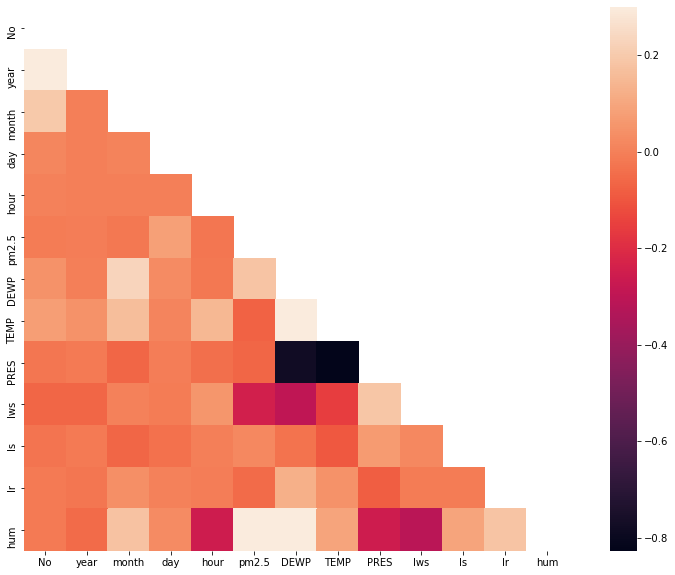

In [15]:
import seaborn as sns
data = df.corr()
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data, mask=mask, vmax=.3, square=True)

In [16]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,hum
No,1.000000,0.979818,0.198630,0.017443,0.000583,-0.009528,0.046393,0.077008,-0.024573,-0.062673,-0.029568,-0.016719,-0.013252
year,0.979818,1.000000,-0.000573,-0.001077,0.000154,-0.006876,0.000151,0.044835,-0.013069,-0.064370,-0.017062,-0.024493,-0.050575
month,0.198630,-0.000573,1.000000,0.009206,-0.000582,-0.021266,0.232543,0.167881,-0.061513,0.002493,-0.061901,0.036541,0.180682
day,0.017443,-0.001077,0.009206,1.000000,0.000052,0.081097,0.027328,0.013326,-0.006913,-0.009141,-0.036920,0.002559,0.028218
hour,0.000583,0.000154,-0.000582,0.000052,1.000000,-0.023593,-0.021267,0.150029,-0.041671,0.056610,-0.002391,-0.006322,-0.256729
pm2.5,-0.009528,-0.006876,-0.021266,0.081097,-0.023593,1.000000,0.183443,-0.071875,-0.061710,-0.246062,0.020398,-0.049038,0.440030
DEWP,0.046393,0.000151,0.232543,0.027328,-0.021267,0.183443,1.000000,0.824458,-0.778787,-0.297034,-0.034532,0.125006,0.622290
TEMP,0.077008,0.044835,0.167881,0.013326,0.150029,-0.071875,0.824458,1.000000,-0.827405,-0.155456,-0.092869,0.048932,0.095473
PRES,-0.024573,-0.013069,-0.061513,-0.006913,-0.041671,-0.061710,-0.778787,-0.827405,1.000000,0.185625,0.069082,-0.079816,-0.256052
Iws,-0.062673,-0.064370,0.002493,-0.009141,0.056610,-0.246062,-0.297034,-0.155456,0.185625,1.000000,0.021856,-0.010180,-0.309699


In [17]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,hum
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,38.784785
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,42.130158
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,62.793843
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,85.857955
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,85.857955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,18.340886
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,21.568601
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,21.568601
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,23.240409


## Add past data columns

In [65]:
need_shift = ['pm2.5', 'DEWP', 'TEMP', 'Iws']
for var in need_shift:
    for i in range(1, 3):
        key = var + '_' + str(i)
        df[key] = df[var].shift(periods=i)
df.dropna(inplace=True)

<ipython-input-65-1ecb35328eb9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[var].shift(periods=i)
<ipython-input-65-1ecb35328eb9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [66]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir', 'hum', 'pm2.5_1', 'DEWP_1', 'TEMP_1',
       'Iws_1', 'pm2.5_2', 'DEWP_2', 'TEMP_2', 'Iws_2'],
      dtype='object')

In [67]:
features_1 = list(df.columns[10:])
predicts = list(df.columns[5:8])

In [68]:
print(features_1)

['Iws', 'Is', 'Ir', 'hum', 'pm2.5_1', 'DEWP_1', 'TEMP_1', 'Iws_1', 'pm2.5_2', 'DEWP_2', 'TEMP_2', 'Iws_2']


In [36]:
X = df[features_1]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/4)

In [37]:
def cal_error(model, X, y):
    predict = model.predict(X)
    data = [0] * 3
    for i in range(len(predict)):
        for j in range(3):
            data[j] += abs(predict[i][j] - y[i][j])
    for i in range(3):
        data[i] /= len(predict)
    return (data[0], data[1], data[2])

In [38]:
def score_model(model, X, y):
    predict = model.predict(X)
    print('R^2 score:', r2_score(predict, y))
    print('Mean Absolute Error:', mean_absolute_error(predict, y))
    print('Error model:', cal_error(model, X, y))

In [39]:
def important_features(model, features):
    foo = pd.Series(model.feature_importances_, index=features)
    foo.nlargest(100).plot(kind='barh')
    plt.style.use('ggplot')
    plt.show()

## Modeling

In [40]:
random_forest = RandomForestRegressor() 
random_forest.fit(Xtrain, ytrain)
random_forest.score(Xtrain, ytrain)

0.9960945715812025

In [41]:
score_model(random_forest, Xtest, ytest)

R^2 score: 0.971236308254201
Mean Absolute Error: 4.956320044887259
Error model: (13.131001995551905, 0.8104112969564092, 0.9275468421534617)


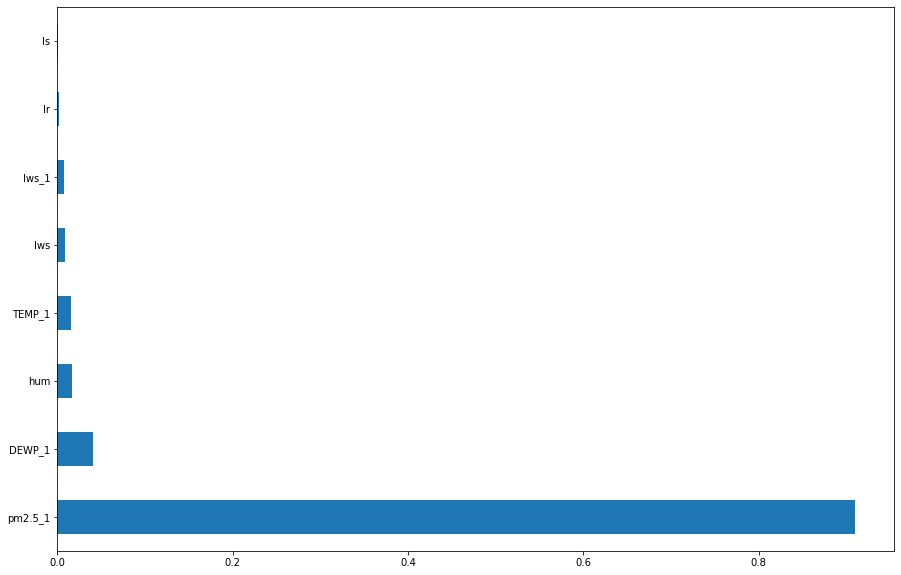

In [42]:
important_features(random_forest, features_1)

In [43]:
remove_list = ['cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'weekday_Fri', 
                 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 
                'weekday_Tue', 'weekday_Wed']
features_2 = [i for i in features_1 if i not in remove_list]

In [44]:
X = df[features_2]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/4)

In [45]:
random_forest_2 = RandomForestRegressor()
random_forest_2.fit(Xtrain, ytrain)
random_forest_2.score(Xtrain, ytrain)

0.9961407330150037

In [46]:
score_model(random_forest_2, Xtest, ytest)

R^2 score: 0.9717908701898242
Mean Absolute Error: 4.904712980735072
Error model: (12.971110577948386, 0.8088803582853554, 0.9341480059714736)


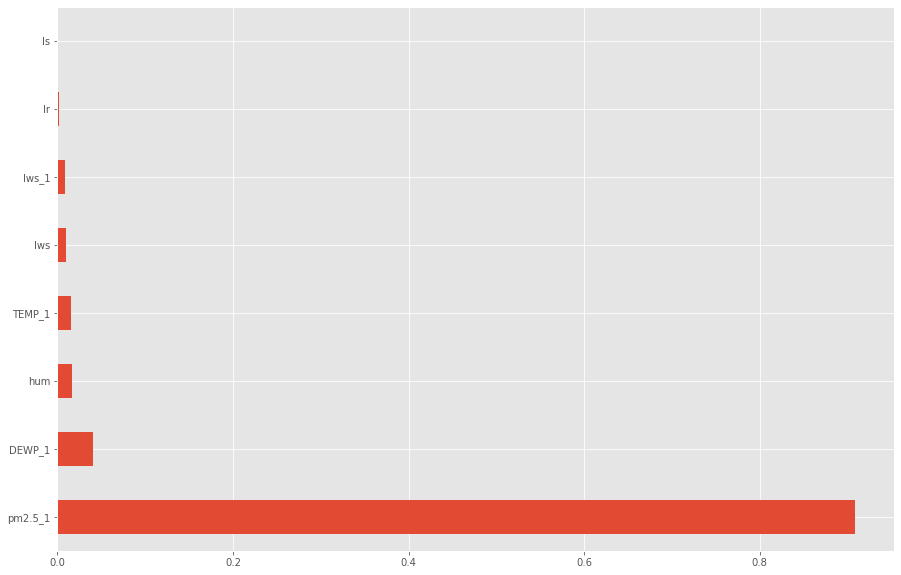

In [47]:
important_features(random_forest_2, features_2)

In [48]:
remove_list = ['Iws_2', 'Iws_1', 'Is', 'Ir', 'Iws']
features_3 = [i for i in features_2 if i not in remove_list]

In [49]:
X = df[features_3]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/4)

In [52]:
random_forest_3 = RandomForestRegressor()
random_forest_3.fit(Xtrain, ytrain)
random_forest_3.score(Xtrain, ytrain)

0.9960905579313345

In [54]:
score_model(random_forest_3, Xtest, ytest)

R^2 score: 0.9689180735439072
Mean Absolute Error: 5.1296564958321955
Error model: (13.873902308993577, 0.7030855650001542, 0.8119816135028547)


In [55]:
features_3

['hum', 'pm2.5_1', 'DEWP_1', 'TEMP_1']

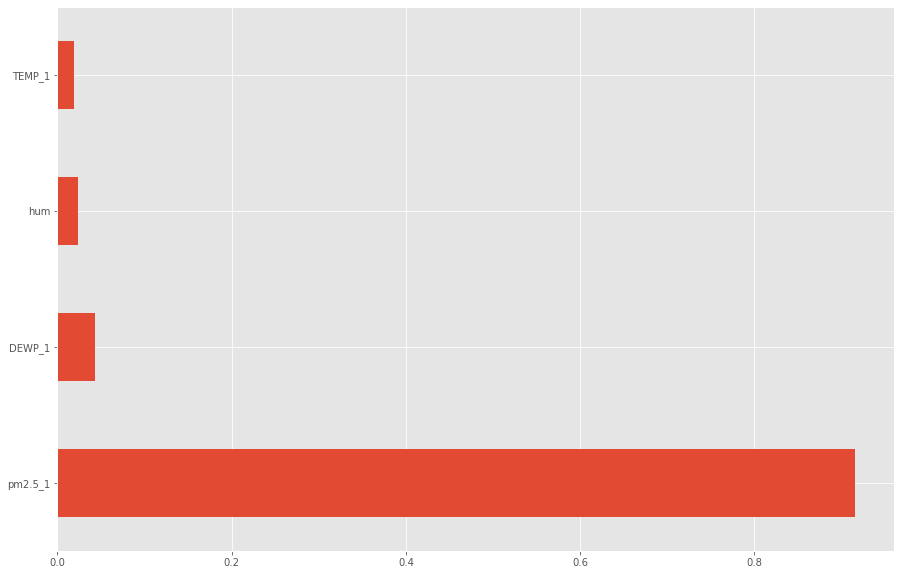

In [56]:
important_features(random_forest_3, features_3)

In [57]:
features_4 = ['pm2.5_1', 'pm2.5_2', 'TEMP_1', 'DEWP_1', 'Iws', 'hum']
X = df[features_4]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/4)

KeyError: "['pm2.5_2'] not in index"

In [ ]:
random_forest_4 = RandomForestRegressor()
random_forest_4.fit(Xtrain, ytrain)
random_forest_4.score(Xtrain, ytrain)

In [ ]:
score_model(random_forest_4, Xtest, ytest)

In [75]:
features = features_1 + ['PRES']

In [86]:
best = (0, [])

In [ ]:
y = df[predicts]
for mask in range(1, 2 ** len(features)):
    lst = []
    for i in range(len(features)):
        if (mask & i):
            lst.append(features[i])
    Xtrain, Xtest, ytrain, ytest = train_test_split(df[lst], y, test_size=1/4)
    random_forest = RandomForestRegressor()
    random_forest.fit(Xtrain, ytrain)
    predict = random_forest.predict(Xtest)
    best = max(best, (r2_score(predict, ytest), lst))
    print(r2_score(predict, ytest), best)

## Predict for next 6 hours

In [ ]:
# for i in range(6):
#     tail = pd.concat([df.tail(1)], ignore_index=True)
#     tail.loc[:, ['day', 'month', 'year', 'hour']] = [1, 1, 2015, i]
#     df = pd.concat([df, tail], ignore_index=True)
#     df.loc[len(df) - 1:, predicts] = random_forest_3.predict(tail[features_3])
#     for var in need_shift:
#         for i in range(1, 3):
#             key = var + '_' + str(i)
#             df[key] = df[var].shift(periods=i)

In [ ]:
# df.tail(6)[['day', 'month', 'year', 'hour'] + predicts]

- season
- trend
- statistical models for time serries
- how data transform by times (up or down, low or high)
- past data for weekdays or for pm2.5 last year
- k fold cross validation for time series